# Segmentación de clientes

In [2]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
#import plotly.io as pio
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

## EDA

In [3]:
#Dimensiones del conjunto de datos
data_df = pd.read_csv("https://github.com/PabloJRW/segemntacion_clientes-basico/raw/main/Mall_Customers.csv")
print('Dimensiones del df:', data_df.shape)

Dimensiones del df: (200, 5)


In [4]:
data_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# Copia del dataframe
data = data_df.copy()

# Eliminamos variables
data.drop("Gender", axis=1, inplace=True)
# Renombramos variables
data.columns = ['CustomerID','age', 'annual_income', 'spending_score']

Veamos gráficamente nuestros datos para observar su dispersión.

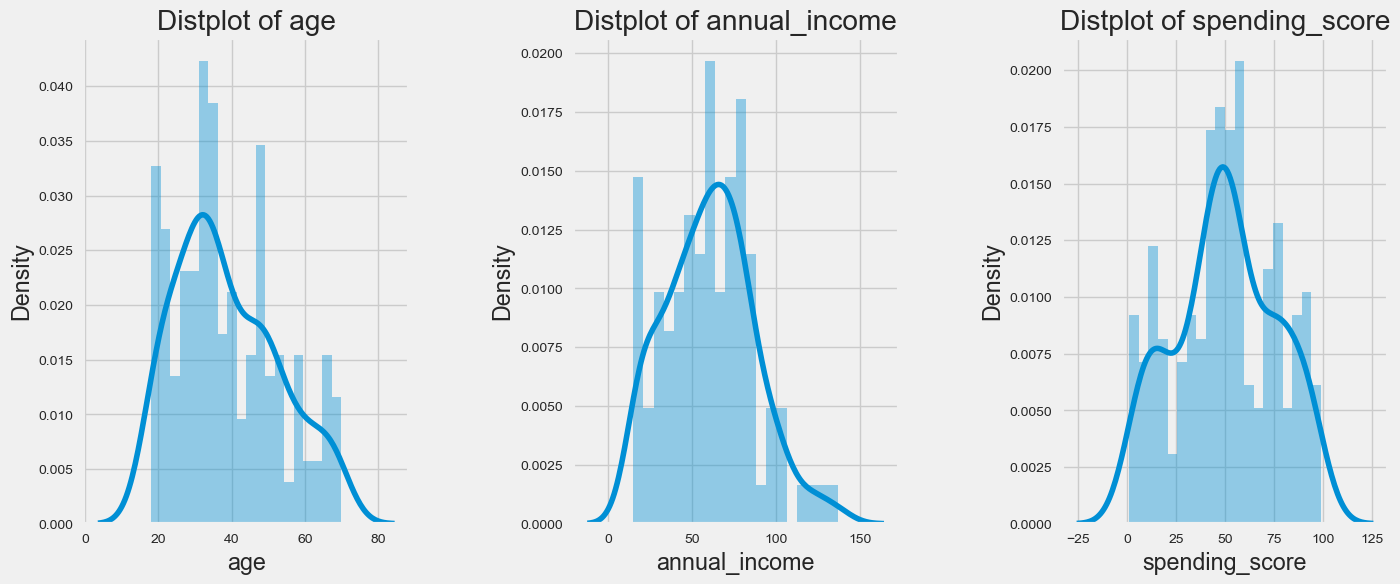

In [6]:
# Distribución de nuestras 3 variables
# =========================================================================
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['age', 'annual_income', 'spending_score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))


## Modelo (K-means)

El siguiente paso será normalizar las variables para que todas estén en una misma escala y no afecte el cálculo de la distancia entre puntos:

In [7]:
# Normalizamos nuestras variables
# ======================================================================
X = data.copy()
X1 = preprocessing.normalize(X)

### Elegir K (número de conglomerados)

Veamos cuántos segmentos puede encontrar el algoritmo en nuestro conjunto de datos. Para ello, utilizaremos el método de codo.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir.

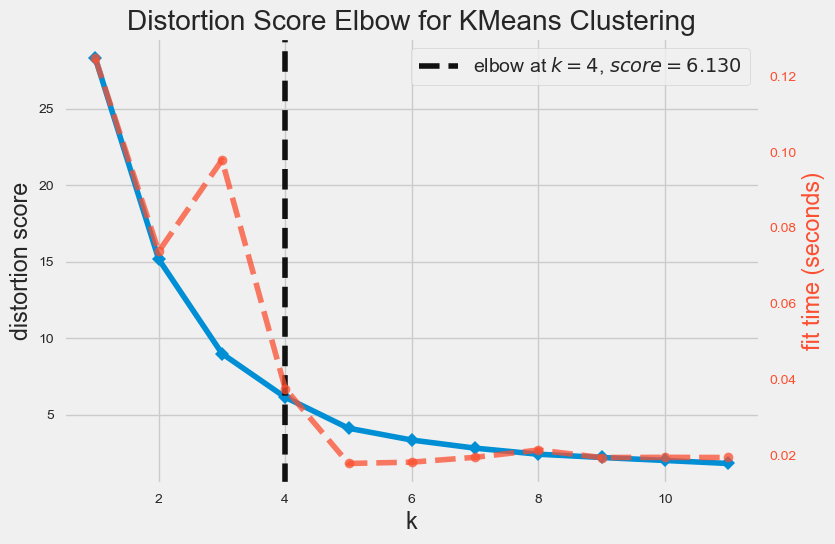

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X1)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

## Entrenamiento del modelo

### 4 Segmentos

In [14]:
kmedia_4k = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_4k.fit(X1)
labels_4k = kmedia_4k.labels_   # Etiqueta de cluters
centroides = kmedia_4k.cluster_centers_   # Centroides de clusters

data['clusters_4k'] =  labels_4k

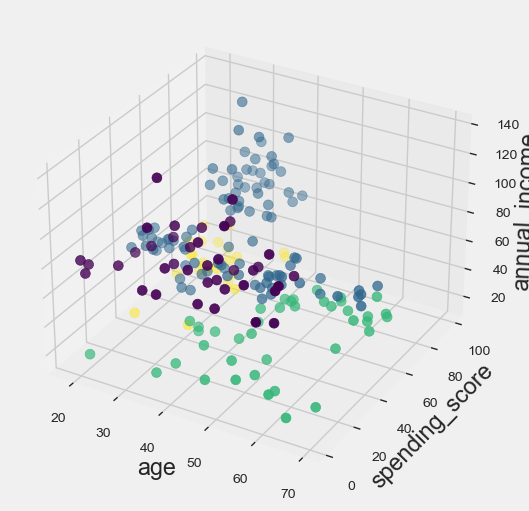

In [15]:
# El gráfico 3D interactivo anterior no se muestra en GitHub
# Por eso, el siguiente gráfico
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')

x = data['age']
y = data['spending_score']
z = data['annual_income']

ax.set_xlabel("age")
ax.set_ylabel('spending_score')
ax.set_zlabel("annual_income")

ax.scatter(x, y, z, c=labels_4k, s= 50, cmap='viridis')

plt.show()

### Clientes Segmentados en 4 clusters

In [16]:
data['clusters_4k']
data.to_csv('clusterized4_data.csv')
data.head(20)

,CustomerID,age,annual_income,spending_score,clusters_4k
0,1,19,15,39,3
1,2,21,15,81,3
2,3,20,16,6,2
3,4,23,16,77,3
4,5,31,17,40,3
5,6,22,17,76,3
6,7,35,18,6,2
7,8,23,18,94,3
8,9,64,19,3,2
9,10,30,19,72,3


In [22]:
data['clusters_4k'].value_counts()

clusters_4k
1    97
2    40
0    38
3    25
Name: count, dtype: int64

### 5 Segmentos

In [18]:
kmedia_5k = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_5k.fit(X1)
labels_5k = kmedia_5k.labels_   # Etiqueta de cluters
centroides = kmedia_5k.cluster_centers_   # Centroides de clusters

data['clusters_5k'] =  labels_5k

### Clientes Segmentados en 5 clusters

In [20]:
data['clusters_5k']
data.to_csv('clusterized5_data.csv')
data.head(20)

,CustomerID,age,annual_income,spending_score,clusters_4k,clusters_5k
0,1,19,15,39,3,3
1,2,21,15,81,3,3
2,3,20,16,6,2,2
3,4,23,16,77,3,3
4,5,31,17,40,3,3
5,6,22,17,76,3,3
6,7,35,18,6,2,2
7,8,23,18,94,3,3
8,9,64,19,3,2,2
9,10,30,19,72,3,3


In [21]:
data['clusters_5k'].value_counts()

clusters_5k
0    76
1    50
4    38
3    23
2    13
Name: count, dtype: int64